In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.integrate import ode
from numpy.lib import scimath
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
#import function to do single simulation
from MeanField.MeanFieldSimulation import single_simulation

In [18]:
N=40000
tf = .12
dt = .1e-4
pulse_start = [.03,.09]
pulse_dur = [1e-5,1e-5]
rabi = 100000

None
[##################################################]100% None
Calculation Finished in time: 24.60
Now Outputting


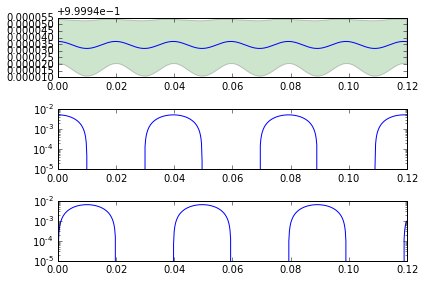

In [19]:
single_simulation(N,tf,dt,pulse_start,pulse_dur,rabi)

In [21]:
np.linspace(0,0,100)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])